In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
rads = np.arange(0,4*np.pi,0.1)
r = 1.5
x, y = r*np.cos(rads), r*np.sin(rads)
dx, dy = np.diff(x), np.diff(y)

In [15]:
rperstep = 0.1
steps = 1000
rmax = 0.1*steps
rads = np.arange(0, rmax, 0.1)

In [21]:
np.tile(rads.reshape((-1,1,1)), reps=(1,1,10)).shape

(1000, 1, 10)

In [77]:
rstart = np.random.uniform(low=0.0, high=2*np.pi, size=10)
radsx, rstarty = np.meshgrid(rstart, rads)

In [85]:
radsx[:, 0]

array([4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462054,
       4.61462054, 4.61462054, 4.61462054, 4.61462054, 4.61462

In [81]:
xstart, ystart = np.random.uniform(-5,5,(1,1,10)), np.random.uniform(-5,5,(1,1,10))
xstart, ystart = np.tile(xstart, reps=(steps,1,1)), np.tile(ystart, reps=(steps,1,1))

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1],
       [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
       ...,
       [99.7, 99.7, 99.7, ..., 99.7, 99.7, 99.7],
       [99.8, 99.8, 99.8, ..., 99.8, 99.8, 99.8],
       [99.9, 99.9, 99.9, ..., 99.9, 99.9, 99.9]])

In [102]:
startrange = (5,5)
N = 10
steps = 1000
xlo, xhi, ylo, yhi = -startrange[0], startrange[0], -startrange[1], startrange[1]
xstart, ystart = np.random.uniform(xlo,xhi,(1,N)), np.random.uniform(xlo,xhi,(1,N))
xstart, ystart = np.tile(xstart, reps=(steps,1)), np.tile(ystart, reps=(steps,1))

In [103]:
xstart.shape

(1000, 10)

In [104]:
def walks2D(scale=(1.0, 1.0), steps=1000, drift=(0.0, 0.0), startrange=(5,5), circles=(0.1, 1), theta=0, N=10, masked=False):
    if startrange:
        xlo, xhi, ylo, yhi = -startrange[0], startrange[0], -startrange[1], startrange[1]
        xstart, ystart = np.random.uniform(xlo,xhi,(1,N)), np.random.uniform(xlo,xhi,(1,N))
        xstart, ystart = np.tile(xstart, reps=(steps,1)), np.tile(ystart, reps=(steps,1))
    else:
        xstart, ystart = 0, 0
    
    if circles:
        rperstep, r = circles[0], circles[1]
        rads = np.arange(0, rperstep*steps, rperstep)
        rstart = np.random.uniform(low=0.0, high=2*np.pi, size=N)
        radsx, rstarty = np.meshgrid(rstart, rads)
        rads = (radsx + rstarty).reshape(steps, 1, N)

        xc, yc = r*np.cos(rads), r*np.sin(rads)
    else:
        xc, yc = np.zeros((steps,1,N)), np.zeros((steps,1,N))
    
    theta = np.radians(theta)
    rMatrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    x = np.cumsum(np.random.normal(loc=drift[0], scale=scale[0], size=(steps, N)), axis=0).reshape((steps, 1, N)) + xc
    y = np.cumsum(np.random.normal(loc=drift[1], scale=scale[1], size=(steps, N)), axis=0).reshape((steps, 1, N)) + yc
    x = np.concatenate((x, y), axis=1)
    
    x = np.matmul(rMatrix, x)
    x, y = x[:, 0, :] + xstart, x[:, 1, :] + ystart

    if masked:
        xi, yi = np.meshgrid(np.arange(0, N), np.arange(0, steps))
        ind = np.random.randint(int(0.75*steps), steps, size=(1, N))
        ind = np.tile(ind, reps=(steps, 1))
        mask = ind < yi
        #x, y = ma.array(x, mask=mask), ma.array(y, mask=mask)
        x[mask], y[mask] = np.nan, np.nan

    return x, y

In [179]:
xs, ys = walks2D(scale=(0.5, 0.5), circles=(0.15,3), startrange=(40,40), drift=(0.02,0.02))

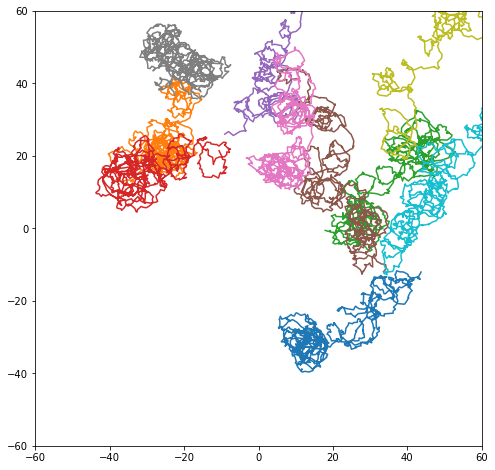

In [180]:
R = 60
fig, ax = plt.subplots(figsize=(8,8))
for i in range(10):
    plt.plot(xs[:,i], ys[:,i])
    plt.xlim([-R,R])
    plt.ylim([-R,R])